In [60]:
import healpy as hp
import numpy as np

NSIDE = 128

healpix_arr = np.array(list(range(NSIDE**2 * 12)))

In [69]:
import pickle

f = open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/data/128-denoised/FlatContinuumIsotropic.inc970.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

healpix_arr = y_arr[10]

(36, 196608)


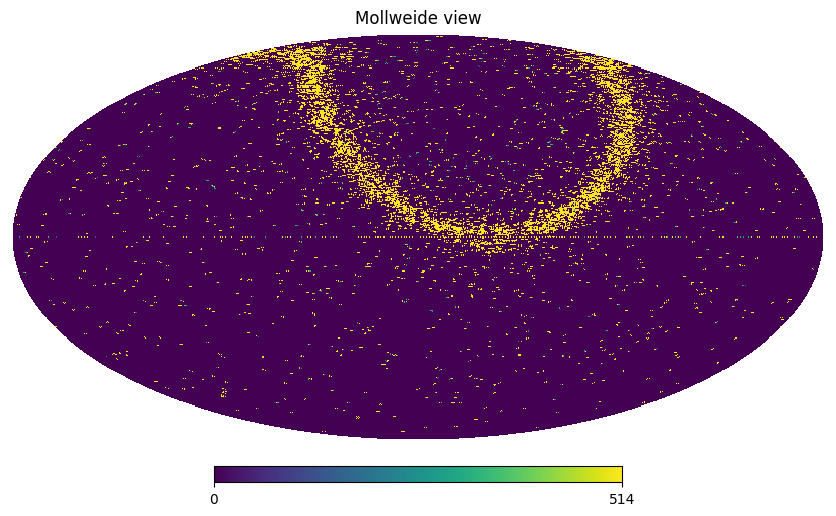

In [70]:
hp.mollview(healpix_arr)

(1536, 2048)


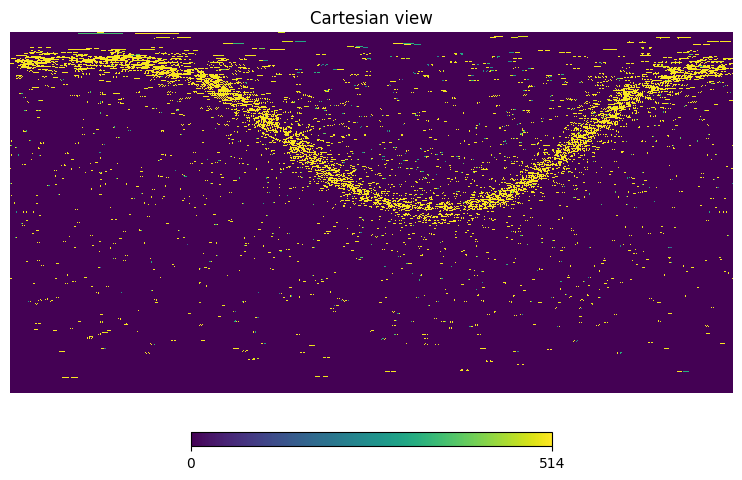

In [79]:
x_dim = 2048
y_dim = 1536
cart_arr = hp.cartview(healpix_arr, xsize=2048, ysize=1536, return_projected_map=True)
print(cart_arr.shape)

In [64]:
# def find_pos(value):
#     for r in range(len(cart_arr)):
#         for c in range(len(cart_arr[0])):
#             if cart_arr[r][c] == value:
#                 return r, c
#     return -1, -1

# pos_map = {}

# for value in healpix_arr:
#     pos = find_pos(value)

#     if pos in pos_map:
#         print('POS:', pos, 'VALUE: ', value, 'is repeated.')
    
#     pos_map[pos] = value

pos_map = {}

for r in range(len(cart_arr)):
    for c in range(len(cart_arr[0])):
        pos = (r, c)
        # for value in healpix_arr:
        #     # if cart_arr[r][c] == value:
        #     #     pos_map[pos] = value
                
        #     #     # Break once you've found the correct position
        #     #     break
            
        pos_map[pos] = int(cart_arr[r][c])
    
    if r % 10 == 0:
        print("Row ", r, ' completed')
            

Row  0  completed
Row  10  completed
Row  20  completed
Row  30  completed
Row  40  completed
Row  50  completed
Row  60  completed
Row  70  completed
Row  80  completed
Row  90  completed
Row  100  completed
Row  110  completed
Row  120  completed
Row  130  completed
Row  140  completed
Row  150  completed
Row  160  completed
Row  170  completed
Row  180  completed
Row  190  completed
Row  200  completed
Row  210  completed
Row  220  completed
Row  230  completed
Row  240  completed
Row  250  completed
Row  260  completed
Row  270  completed
Row  280  completed
Row  290  completed
Row  300  completed
Row  310  completed
Row  320  completed
Row  330  completed
Row  340  completed
Row  350  completed
Row  360  completed
Row  370  completed
Row  380  completed
Row  390  completed
Row  400  completed
Row  410  completed
Row  420  completed
Row  430  completed
Row  440  completed
Row  450  completed
Row  460  completed
Row  470  completed
Row  480  completed
Row  490  completed
Row  500  c

In [80]:
with open(f'../../mappings/NSIDE_{NSIDE}_x{x_dim}_y{y_dim}.pickle', 'wb') as f:
    pickle.dump(pos_map, f)

In [65]:
len(list(pos_map.keys()))

3145728

In [66]:
len(set(pos_map.keys()))

3145728

In [67]:
def print_repeats(lst):
    count_dict = {}
    
    # Count occurrences of each value in the list
    for item in lst:
        count_dict[item] = count_dict.get(item, 0) + 1
    
    # Print the repeated values
    for key, value in count_dict.items():
        if value > 1:
            print(f"{key} is repeated {value} times.")

print_repeats(pos_map.values())

196606 is repeated 2485 times.
196605 is repeated 2477 times.
196604 is repeated 2480 times.
196607 is repeated 2480 times.
196600 is repeated 833 times.
196599 is repeated 827 times.
196598 is repeated 829 times.
196597 is repeated 830 times.
196596 is repeated 830 times.
196603 is repeated 830 times.
196602 is repeated 830 times.
196601 is repeated 829 times.
196590 is repeated 546 times.
196589 is repeated 540 times.
196588 is repeated 542 times.
196587 is repeated 541 times.
196586 is repeated 542 times.
196585 is repeated 541 times.
196584 is repeated 541 times.
196595 is repeated 541 times.
196594 is repeated 541 times.
196593 is repeated 542 times.
196592 is repeated 541 times.
196591 is repeated 542 times.
196576 is repeated 406 times.
196575 is repeated 400 times.
196574 is repeated 402 times.
196573 is repeated 402 times.
196572 is repeated 401 times.
196571 is repeated 403 times.
196570 is repeated 403 times.
196569 is repeated 402 times.
196568 is repeated 403 times.
196583

In [72]:
reconstructed = [0] * len(healpix_arr)

for pos, value in pos_map.items():
    r, c = pos 
    reconstructed[value] = cart_arr[r][c]

reconstructed = np.array(reconstructed)

In [73]:
print(reconstructed)

[478. 510.   0. ...   0.   0.   0.]


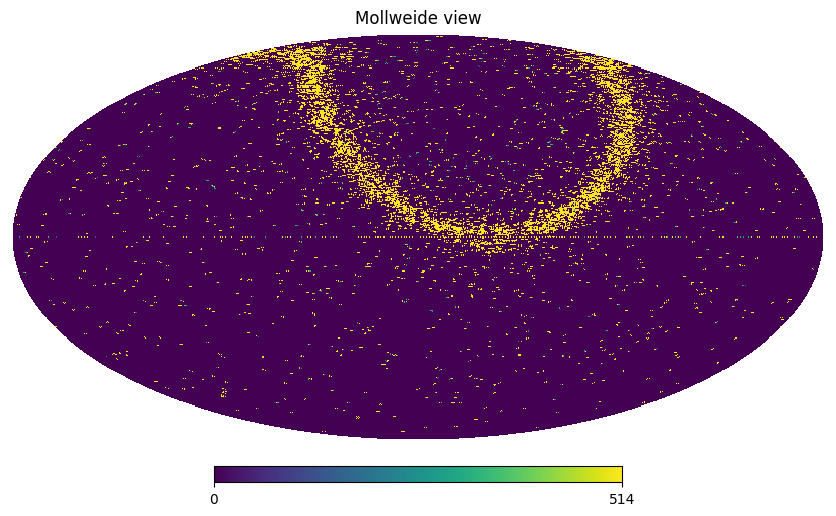

In [76]:
hp.mollview(reconstructed)

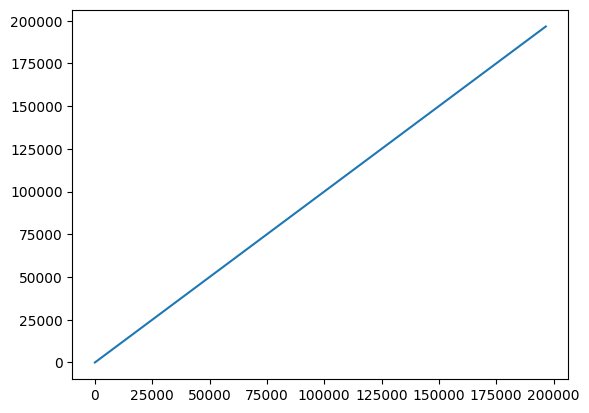

In [53]:
import matplotlib.pyplot as plt

plt.plot(range(len(healpix_arr)), reconstructed)